# Question 1

For this assignment, you will be required to explore and cluster the neighborhoods in Toronto.

Start by creating a new Notebook for this assignment.
Use the Notebook to build the code to scrape the following Wikipedia page, https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M, in order to obtain the data that is in the table of postal codes and to transform the data into a pandas dataframe like the one shown below:

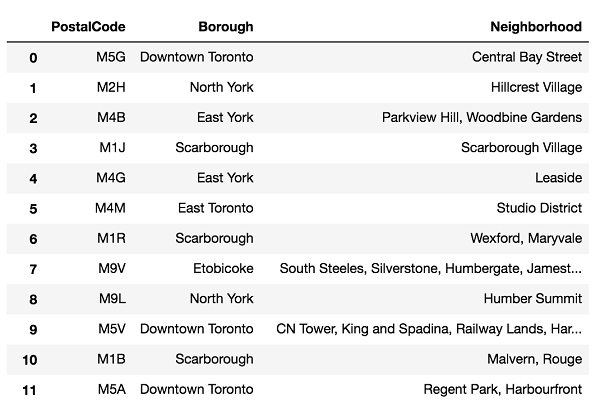

3. To create the above dataframe:

The dataframe will consist of three columns: PostalCode, Borough, and Neighborhood
Only process the cells that have an assigned borough. Ignore cells with a borough that is Not assigned.
More than one neighborhood can exist in one postal code area. For example, in the table on the Wikipedia page, you will notice that M5A is listed twice and has two neighborhoods: Harbourfront and Regent Park. These two rows will be combined into one row with the neighborhoods separated with a comma as shown in row 11 in the above table.
If a cell has a borough but a Not assigned neighborhood, then the neighborhood will be the same as the borough.
Clean your Notebook and add Markdown cells to explain your work and any assumptions you are making.
In the last cell of your notebook, use the .shape method to print the number of rows of your dataframe.
4. Submit a link to your Notebook on your Github repository. (10 marks)

In [1]:
#import pandas and numpy
import pandas as pd
import numpy as np

In [2]:
url = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"

dfs = pd.read_html(url)
df = dfs[0] #extract the first table from the wikipedia page

In [3]:
df

,Postal Code,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
...,...,...,...
175,M5Z,Not assigned,Not assigned
176,M6Z,Not assigned,Not assigned
177,M7Z,Not assigned,Not assigned
178,M8Z,Etobicoke,"Mimico NW, The Queensway West, South of Bloor,..."


In [4]:
#remove rows for unassigned postal codes.
for i in np.arange(180):
    if df.loc[i, "Borough"] and df.loc[i, "Neighbourhood"] == "Not assigned":
        df.drop([i],axis = 0, inplace = True)
    elif df.loc[i, "Neighbourhood"] == "Not assigned":
        df.loc[i, "Neighbourhood"] = df.loc[i, "Borough"]

#rename columns as in the instructions
df.rename(columns = {"Postal Code" : "PostalCode", "Neighbourhood" : "Neighborhood"}, inplace=True)

In [5]:
#reset row indeces
df.reset_index(drop=True, inplace=True)
df

,PostalCode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
...,...,...,...
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North"
99,M4Y,Downtown Toronto,Church and Wellesley
100,M7Y,East Toronto,"Business reply mail Processing Centre, South C..."
101,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu..."


In [6]:
#df.describe()
df.shape

(103, 3)